## Final Project Submission

Please fill out:
* Student name: Nelima Wanyama
* Student pace: part time 
* Scheduled project review date/time: 9/9/2024 2359hrs
* Instructor name: William Okomba
* Blog post URL:https://github.com/vnelima/Phase-1_Project_Aviation_


# Project Overview
### For this project I will collect, explore and prepare relevant data and use models that will help me understand and give feedback to the company so as to make informed, low-risk decisions when purchasing aircrafts for the new division.


# Business Problem
### The company is expanding in to new industries to diversify its portfolio. Specifically interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. I have been charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. I have translated my findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.


# Objectives
* To identify which aircrafts or make have the lowest risk.
* To identify locations or environments where incidents or accidents are most prone
* To determine whether to invest in amateur built aircrafts 
* To determine the make with least number of accidents
* To determine factors that contribute to aviation risk, that is, make/model, weather condition, Location
* To determine purpose of the flight


In [178]:
# Importing Libraries
# numpy is a python library that helps us work with large arrays
import numpy as np
# pandas is used for manipulating spreadsheets
import pandas as pd
# matplotlib enbles us to plot a line plot with x and y axis
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [179]:
# Reading dataset from CSV file and creating the dataset
df = pd.read_csv("AviationData.csv", encoding='latin-1')
df

c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,2.02212E+13,Accident,ERA23LA093,12/26/2022,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,91,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,2.02212E+13,Accident,ERA23LA095,12/26/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,2.02212E+13,Accident,WPR23LA075,12/26/2022,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,91,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,2.02212E+13,Accident,WPR23LA076,12/26/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,91,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [180]:
# Reviewing the first 5 rows of the dataset
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [181]:
# column check
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [182]:
# checking the number of columns
len(df.columns)

31

In [183]:
# Reviewing the last 5 rows of the dataset
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,2.02212E+13,Accident,ERA23LA093,12/26/2022,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,91,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,2.02212E+13,Accident,ERA23LA095,12/26/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,2.02212E+13,Accident,WPR23LA075,12/26/2022,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,91,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,2.02212E+13,Accident,WPR23LA076,12/26/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,91,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,2.02212E+13,Accident,ERA23LA097,12/29/2022,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,91,NaN,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


# Data Cleaning

In [184]:
# Assessing Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [185]:
# To calculate statistical data, mean, median, mode, percentile
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [186]:
# Dropping columns that we will not need during analysis and that do not feed into our main objectives
# For credibility of the dataset
df.drop(columns=['Event.Id', 'Latitude', 'Longitude', 'Airport.Code', 'Schedule', 'Air.carrier', 'Report.Status', 'Publication.Date' ], inplace=True)
df


,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,ERA23LA093,12/26/2022,"Annapolis, MD",United States,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,91,Personal,0.0,1.0,0.0,0.0,NaN,NaN
88885,Accident,ERA23LA095,12/26/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
88886,Accident,WPR23LA075,12/26/2022,"Payson, AZ",United States,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,91,Personal,0.0,0.0,0.0,1.0,VMC,NaN
88887,Accident,WPR23LA076,12/26/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,91,Personal,0.0,0.0,0.0,0.0,NaN,NaN


In [187]:
# To change all letters to be uppercase in the Make column
# This is for uniformity and to enable me identify the unique characters in the column
df['Make'] = df['Make'].str.upper()
df['Make']

0                           STINSON
1                             PIPER
2                            CESSNA
3                          ROCKWELL
4                            CESSNA
                    ...            
88884                         PIPER
88885                      BELLANCA
88886    AMERICAN CHAMPION AIRCRAFT
88887                        CESSNA
88888                         PIPER
Name: Make, Length: 88889, dtype: object

In [188]:
 # # To change all letters to be uppercase in the Make column combined with the unique items in the Make column
# df['combined Make'] = df['Make'] + df['unique_code'].astype(str)
pd.set_option("display.max_columns", None)
Make_counts = df['Make'].unique()

Make_counts


array(['STINSON', 'PIPER', 'CESSNA', ..., 'JAMES R DERNOVSEK',
       'ORLICAN S R O', 'ROYSE RALPH L'], dtype=object)

In [189]:
# For uniformity in 'Make' column replacing CESNA with CESSNA and Airbus Industrie with Airbus 
# Define replacements
replacements = {'CESNA': 'CESSNA','Airbus Industrie': 'Airbus'}
# Apply replacements
df['Make'] = df['Make'].replace(replacements, regex=True)

In [190]:
# Checking for missing values in the data set so as to ensure dataset is complete
df.isnull().sum()

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
dtype: int64

In [191]:
# replacing the null values in the columns with 'unknown'
columns_to_replace = ['Location', 'Country', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description','Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Uninjured', 'Broad.phase.of.flight', 'Aircraft.Category', 'Total.Minor.Injuries']
df[columns_to_replace] = df[columns_to_replace].fillna('Unknown')



df

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,Unknown,Fatal(2),Destroyed,Unknown,NC6404,STINSON,108-3,No,1,Reciprocating,Unknown,Personal,2,0,0,0,UNK,Cruise
1,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,Unknown,Fatal(4),Destroyed,Unknown,N5069P,PIPER,PA24-180,No,1,Reciprocating,Unknown,Personal,4,0,0,0,UNK,Unknown
2,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,Unknown,Fatal(3),Destroyed,Unknown,N5142R,CESSNA,172M,No,1,Reciprocating,Unknown,Personal,3,Unknown,Unknown,Unknown,IMC,Cruise
3,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,Unknown,Fatal(2),Destroyed,Unknown,N1168J,ROCKWELL,112,No,1,Reciprocating,Unknown,Personal,2,0,0,0,IMC,Cruise
4,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,Unknown,Fatal(1),Destroyed,Unknown,N15NY,CESSNA,501,No,Unknown,Unknown,Unknown,Personal,1,2,Unknown,0,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,ERA23LA093,12/26/2022,"Annapolis, MD",United States,Unknown,Minor,Unknown,Unknown,N1867H,PIPER,PA-28-151,No,Unknown,Unknown,91,Personal,0,1,0,0,NaN,Unknown
88885,Accident,ERA23LA095,12/26/2022,"Hampton, NH",United States,Unknown,Unknown,Unknown,Unknown,N2895Z,BELLANCA,7ECA,No,Unknown,Unknown,Unknown,Unknown,0,0,0,0,NaN,Unknown
88886,Accident,WPR23LA075,12/26/2022,"Payson, AZ",United States,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1,Unknown,91,Personal,0,0,0,1,VMC,Unknown
88887,Accident,WPR23LA076,12/26/2022,"Morgan, UT",United States,Unknown,Unknown,Unknown,Unknown,N210CU,CESSNA,210N,No,Unknown,Unknown,91,Personal,0,0,0,0,NaN,Unknown


In [192]:
# Convert the entire 'Weather.Condition' column to uppercase
df['Weather.Condition'].str.upper()
df

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,Unknown,Fatal(2),Destroyed,Unknown,NC6404,STINSON,108-3,No,1,Reciprocating,Unknown,Personal,2,0,0,0,UNK,Cruise
1,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,Unknown,Fatal(4),Destroyed,Unknown,N5069P,PIPER,PA24-180,No,1,Reciprocating,Unknown,Personal,4,0,0,0,UNK,Unknown
2,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,Unknown,Fatal(3),Destroyed,Unknown,N5142R,CESSNA,172M,No,1,Reciprocating,Unknown,Personal,3,Unknown,Unknown,Unknown,IMC,Cruise
3,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,Unknown,Fatal(2),Destroyed,Unknown,N1168J,ROCKWELL,112,No,1,Reciprocating,Unknown,Personal,2,0,0,0,IMC,Cruise
4,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,Unknown,Fatal(1),Destroyed,Unknown,N15NY,CESSNA,501,No,Unknown,Unknown,Unknown,Personal,1,2,Unknown,0,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,ERA23LA093,12/26/2022,"Annapolis, MD",United States,Unknown,Minor,Unknown,Unknown,N1867H,PIPER,PA-28-151,No,Unknown,Unknown,91,Personal,0,1,0,0,NaN,Unknown
88885,Accident,ERA23LA095,12/26/2022,"Hampton, NH",United States,Unknown,Unknown,Unknown,Unknown,N2895Z,BELLANCA,7ECA,No,Unknown,Unknown,Unknown,Unknown,0,0,0,0,NaN,Unknown
88886,Accident,WPR23LA075,12/26/2022,"Payson, AZ",United States,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1,Unknown,91,Personal,0,0,0,1,VMC,Unknown
88887,Accident,WPR23LA076,12/26/2022,"Morgan, UT",United States,Unknown,Unknown,Unknown,Unknown,N210CU,CESSNA,210N,No,Unknown,Unknown,91,Personal,0,0,0,0,NaN,Unknown


In [193]:
# Replace "Unk" with "UNK" in the 'Weather.Condition' column
df['Weather.Condition'].replace('Unk', 'UNK', inplace=True)
df['Weather.Condition']


0        UNK
1        UNK
2        IMC
3        IMC
4        VMC
        ... 
88884    NaN
88885    NaN
88886    VMC
88887    NaN
88888    NaN
Name: Weather.Condition, Length: 88889, dtype: object

In [194]:
# Replace NaN values in 'Weather.Condition' with 'UNK'
df['Weather.Condition'].fillna('UNK', inplace=True)
df['Weather.Condition']

0        UNK
1        UNK
2        IMC
3        IMC
4        VMC
        ... 
88884    UNK
88885    UNK
88886    VMC
88887    UNK
88888    UNK
Name: Weather.Condition, Length: 88889, dtype: object

In [195]:
# To get a list of all column names in the dataset
column_names = df.columns.tolist()
column_names

['Investigation.Type',
 'Accident.Number',
 'Event.Date',
 'Location',
 'Country',
 'Airport.Name',
 'Injury.Severity',
 'Aircraft.damage',
 'Aircraft.Category',
 'Registration.Number',
 'Make',
 'Model',
 'Amateur.Built',
 'Number.of.Engines',
 'Engine.Type',
 'FAR.Description',
 'Purpose.of.flight',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Weather.Condition',
 'Broad.phase.of.flight']

In [196]:
df.isnull().sum()

Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
dtype: int64

In [197]:
# Saving the cleaned DataFrame to a CSV file
df.to_csv('cleaned_aviation_data.csv', index=False)

In [198]:
# To determine the aircraft with the lowest risk for the company i want to check the frequency of the accidents


# Group by 'Make' and 'Model', count the number of incidents (rows)
accident_frequency = df.groupby(['Make', 'Model']).size().reset_index(name='Accident_Frequency')

# Sort the results by 'Accident_Frequency' to find models with the highest incident counts
accident_frequency_sorted = accident_frequency.sort_values(by='Accident_Frequency', ascending=False)

# Display the top 10 aircraft models with the highest accident frequency
print(accident_frequency_sorted.head(10))


         Make      Model  Accident_Frequency
4670   CESSNA        152                2366
4694   CESSNA        172                1753
4745   CESSNA       172N                1163
13569   PIPER  PA-28-140                 932
4643   CESSNA        150                 829
4743   CESSNA       172M                 798
4748   CESSNA       172P                 689
4802   CESSNA        182                 659
4778   CESSNA        180                 621
4669   CESSNA       150M                 585


In [199]:
# Group by 'Aircraft.Category' to count the number of incidents
accidents_by_category = df.groupby('Aircraft.Category').size().reset_index(name='Incident_Count')

# Sort the data to see which category has the highest number of incidents
accidents_by_category_sorted = accidents_by_category.sort_values(by='Incident_Count', ascending=False)

# Display the result
print(accidents_by_category_sorted)


    Aircraft.Category  Incident_Count
12            Unknown           56616
0            Airplane           27617
5          Helicopter            3440
3              Glider             508
1             Balloon             231
4           Gyrocraft             173
14       Weight-Shift             161
6   Powered Parachute              91
11         Ultralight              30
13               WSFT               9
7        Powered-Lift               5
2               Blimp               4
10                UNK               2
8              Rocket               1
9                ULTR               1


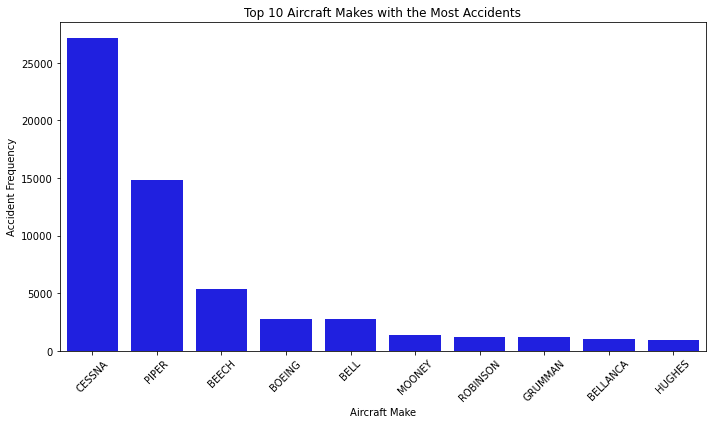

In [200]:
# To identify the Top 10 Makes with the highest accident frequency
top_10_makes = accident_frequency.groupby('Make').sum().sort_values(by='Accident_Frequency', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_makes.index, y=top_10_makes['Accident_Frequency'], color='Blue')
plt.title('Top 10 Aircraft Makes with the Most Accidents')
plt.xlabel('Aircraft Make')
plt.ylabel('Accident Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

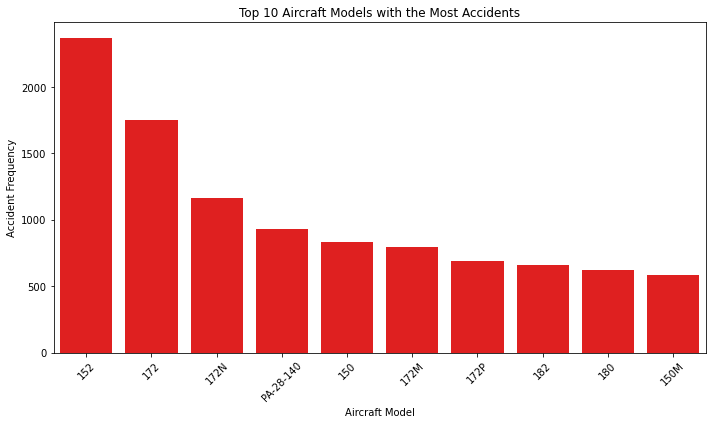

In [201]:
# To determine the model that is frequently involved in accidents
# Top 10 Models with the highest accident frequency
top_10_models = accident_frequency_sorted.head(10)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accident_Frequency', data=top_10_models, color='Red')
plt.title('Top 10 Aircraft Models with the Most Accidents')
plt.xlabel('Aircraft Model')
plt.ylabel('Accident Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [202]:
# Identifying the Risk on the aircraft associated with factors such as Make, Model, Weather conditions that will influence purchase of the aircraft
# Group by 'Make', 'Model', and 'Aircraft.Category' to calculate accident frequency
accident_frequency = df.groupby(['Make', 'Model', 'Aircraft.Category']).size().reset_index(name='Accident_Frequency')

# Sort the results by 'Accident_Frequency' to get the most frequent accidents
accident_frequency_sorted = accident_frequency.sort_values(by='Accident_Frequency', ascending=False)

# Display the top 10
print(accident_frequency_sorted.head(10))


         Make      Model Aircraft.Category  Accident_Frequency
5387   CESSNA        152           Unknown                1916
5419   CESSNA        172           Unknown                 886
5418   CESSNA        172          Airplane                 867
5490   CESSNA       172N           Unknown                 848
15285   PIPER  PA-28-140           Unknown                 700
5487   CESSNA       172M           Unknown                 581
5346   CESSNA        150           Unknown                 573
5494   CESSNA       172P           Unknown                 522
5385   CESSNA       150M           Unknown                 485
15126   PIPER      PA-18           Unknown                 470


In [203]:
# Check data types of the injury columns
print(df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].dtypes)

# Check for non-numeric values in these columns
print(df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].apply(pd.to_numeric, errors='coerce').isnull().sum())


Total.Fatal.Injuries      object
Total.Serious.Injuries    object
Total.Minor.Injuries      object
dtype: object
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
dtype: int64


In [204]:
# Select injury-related columns
injury_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# Ensure the injury columns are numeric
df[injury_columns] = df[injury_columns].apply(pd.to_numeric, errors='coerce')

# Recalculate the Severity Index
df['Severity_Index'] = (df['Total.Fatal.Injuries'] * 3 + 
                        df['Total.Serious.Injuries'] * 2 + 
                        df['Total.Minor.Injuries'] * 1) / (df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries'] + 1)

# Display the top 10 severity index results
severity_index_sorted = df.groupby(['Make', 'Model', 'Aircraft.Category'])['Severity_Index'].mean().reset_index()
severity_index_sorted = severity_index_sorted.sort_values(by='Severity_Index', ascending=False)
print(severity_index_sorted.head(10))


                    Make       Model Aircraft.Category  Severity_Index
13191  MCDONNELL DOUGLAS     DC-8-62           Unknown        2.982857
992               AIRBUS  A320 - 216          Airplane        2.981595
4288              BOEING       MD-83           Unknown        2.980519
3641              BOEING         707           Unknown        2.979310
3633              BOEING        -959           Unknown        2.975806
971               AIRBUS        A310          Airplane        2.967532
19546            TUPOLEV       TU154          Airplane        2.966667
8085             DOUGLAS       MD-83           Unknown        2.966292
1501             ANTONOV       AN148          Airplane        2.958333
4192              BOEING   B-757-23A           Unknown        2.957746


  Weather.Condition  Accident_Frequency
2               VMC               77303
0               IMC                5976
1               UNK                5610


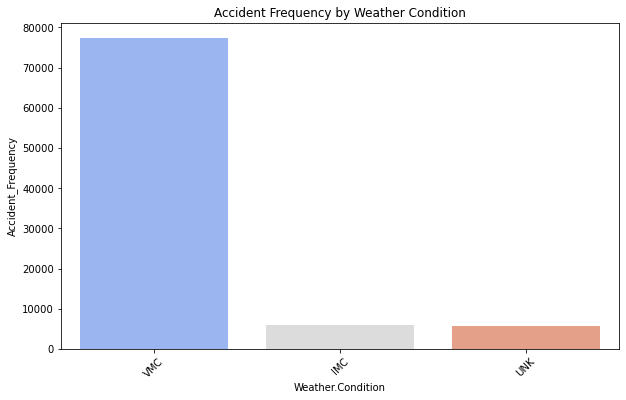

In [205]:
# Group by 'Weather.Condition' to calculate the accident frequency under different weather conditions
weather_impact = df.groupby('Weather.Condition').size().reset_index(name='Accident_Frequency')

# Sort the results by frequency
weather_impact_sorted = weather_impact.sort_values(by='Accident_Frequency', ascending=False)

# Display the weather conditions with the highest accident frequency
print(weather_impact_sorted.head(10))

# To visualize accident frequency by weather conditions

plt.figure(figsize=(10, 6))
sns.barplot(x='Weather.Condition', y='Accident_Frequency', data=weather_impact_sorted, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Accident Frequency by Weather Condition')
plt.show()


In [206]:
df.columns

Index(['Investigation.Type', 'Accident.Number', 'Event.Date', 'Location',
       'Country', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Severity_Index'],
      dtype='object')

In [207]:
# Further breaking down frequency of accidents by specific airports to check if there is a competency issue
# Group by airport name to get the frequency of accidents
airport_accidents = df.groupby('Airport.Name').size().reset_index(name='Accident_Count')
airport_accidents_sorted = airport_accidents.sort_values(by='Accident_Count', ascending=False)

# Display top 10 airports with the most accidents
print(airport_accidents_sorted.head(10))


           Airport.Name  Accident_Count
23107           Unknown           36106
18126           Private             240
17494           PRIVATE             224
18135  Private Airstrip             153
15729              NONE             146
17518     PRIVATE STRIP             111
17503  PRIVATE AIRSTRIP              92
16051              None              86
14006     MERRILL FIELD              83
23150          VAN NUYS              81


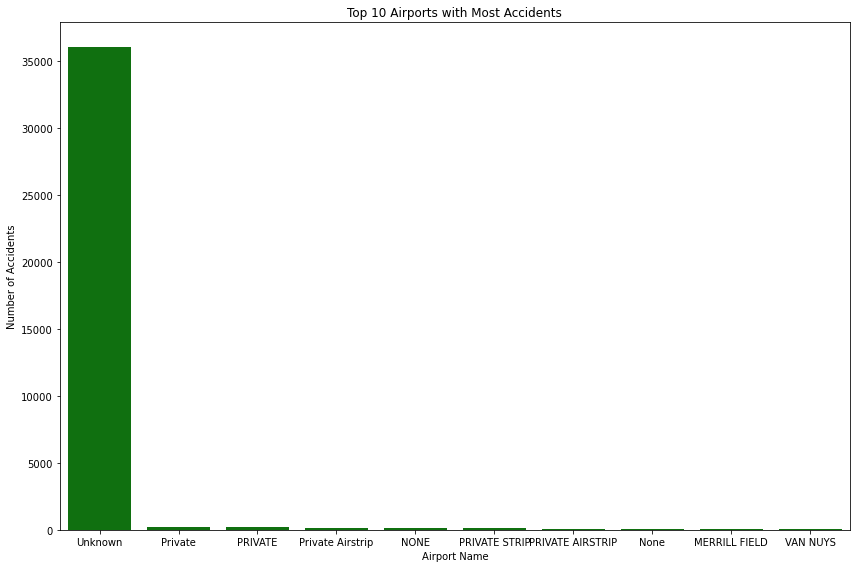

In [208]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Airport.Name', y='Accident_Count', data=airport_accidents_sorted.head(10), color='Green')
plt.title('Top 10 Airports with Most Accidents')
plt.xlabel('Airport Name')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


In [209]:
# To compare accident rates and weather conditions for amateur-built vs. non-amateur-built aircraft.
# Group by 'Amateur.Built' to compare accident frequencies
amateur_vs_non_amateur = df.groupby('Amateur.Built').size().reset_index(name='Accident_Frequency')

# Calculate percentage of accidents for each category
total_accidents = df['Amateur.Built'].count()
amateur_vs_non_amateur['Percentage'] = (amateur_vs_non_amateur['Accident_Frequency'] / total_accidents) * 100

print(amateur_vs_non_amateur)


  Amateur.Built  Accident_Frequency  Percentage
0            No               80312   90.350887
1       Unknown                 102    0.114750
2           Yes                8475    9.534363


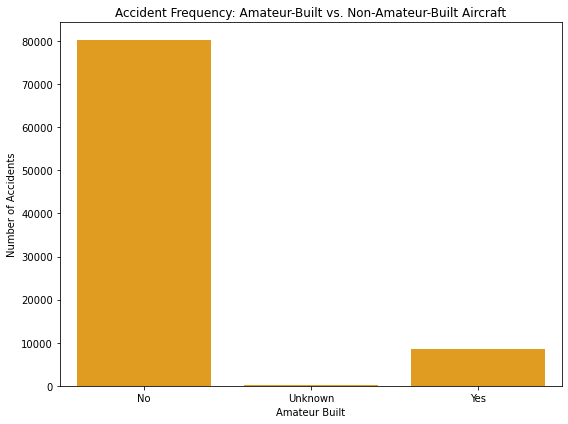

In [210]:
# Bar plot for accident frequency comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Amateur.Built', y='Accident_Frequency', data=amateur_vs_non_amateur, color='Orange')
plt.title('Accident Frequency: Amateur-Built vs. Non-Amateur-Built Aircraft')
plt.xlabel('Amateur Built')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


In [211]:
# Identify if certain flight purposes (e.g., training, commercial, private) are more prone to accidents.
# Group by 'Purpose.of.flight' and calculate accident frequency
accident_rates_by_purpose = df.groupby('Purpose.of.flight').size().reset_index(name='Accident_Count')

# Calculate the total number of accidents for normalization
total_accidents = df.shape[0]

# Calculate the percentage of accidents for each purpose
accident_rates_by_purpose['Accident_Percentage'] = (accident_rates_by_purpose['Accident_Count'] / total_accidents) * 100

print(accident_rates_by_purpose)


            Purpose.of.flight  Accident_Count  Accident_Percentage
0                        ASHO               6             0.006750
1          Aerial Application            4712             5.300993
2          Aerial Observation             794             0.893249
3                    Air Drop              11             0.012375
4               Air Race show              99             0.111375
5               Air Race/show              59             0.066375
6                  Banner Tow             101             0.113625
7                    Business            4018             4.520244
8         Executive/corporate             553             0.622124
9               External Load             123             0.138375
10                      Ferry             812             0.913499
11               Firefighting              40             0.045000
12                Flight Test             405             0.455624
13                 Glider Tow              53             0.05

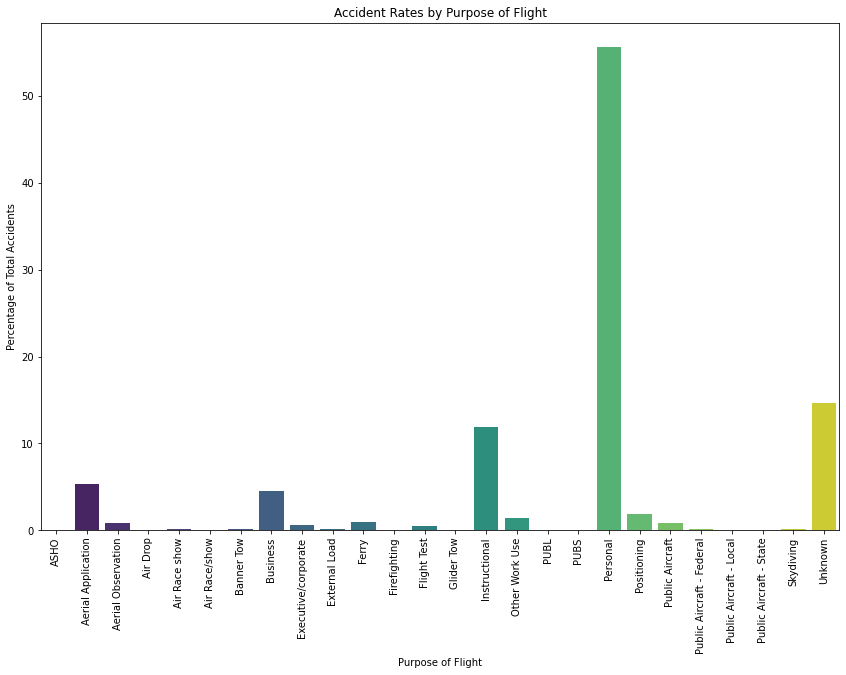

In [212]:

# Bar plot for accident rates by flight purpose
plt.figure(figsize=(12, 8))
sns.barplot(x='Purpose.of.flight', y='Accident_Percentage', data=accident_rates_by_purpose, palette='viridis')
plt.title('Accident Rates by Purpose of Flight')
plt.xlabel('Purpose of Flight')
plt.ylabel('Percentage of Total Accidents')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()
